In [718]:
res_counter = 0
with open("/home/yifan/Desktop/2ZFF__1__P_Dynamics_2.pdb") as file:
    lines = file.readlines()
    for line in lines:
        if "HETATM" in line and "MOL" in line:
            print(line)
            res_counter += 1

HETATM 4157  N   MOL I   1      18.195 -13.070  21.394  1.00  0.00           N  

HETATM 4158  C   MOL I   1      18.145 -11.732  20.781  1.00  0.00           C  

HETATM 4159  C1  MOL I   1      17.373 -13.389  22.417  1.00  0.00           C  

HETATM 4160  O   MOL I   1      16.495 -12.653  22.846  1.00  0.00           O  

HETATM 4161  C2  MOL I   1      16.758 -11.331  20.321  1.00  0.00           C  

HETATM 4162  O1  MOL I   1      16.280 -10.225  20.538  1.00  0.00           O  

HETATM 4163  C3  MOL I   1      19.105 -11.877  19.589  1.00  0.00           C  

HETATM 4164  C4  MOL I   1      17.575 -14.763  23.025  1.00  0.00           C  

HETATM 4165  N1  MOL I   1      16.131 -12.319  19.662  1.00  0.00           N  

HETATM 4166  C5  MOL I   1      20.072 -12.987  20.008  1.00  0.00           C  

HETATM 4167  N2  MOL I   1      16.239 -15.449  23.011  1.00  0.00           N1+

HETATM 4168  C6  MOL I   1      18.030 -14.636  24.494  1.00  0.00           C  

HETATM 4169  C7 

In [719]:
print(f"The system contains {res_counter} ligand atoms.")

The system contains 58 ligand atoms.


In [720]:
import numpy as np
import MDAnalysis as mda
import MDAnalysis.analysis
import MDAnalysis.analysis.rms
import MDAnalysis.analysis.distances
import matplotlib.pyplot as plt

In [721]:
data_path = "../Desktop/"

In [722]:
protein_frames = []
with mda.lib.formats.libdcd.DCDFile(data_path+"2ZFF__1__P_Dynamics_2.dcd") as trajectory_file:
    for frame in trajectory_file:
        protein_frames.append(frame)

In [723]:
protein_first_frame = protein_frames[0].xyz
universe = mda.Universe(data_path+"2ZFF__1__P_Dynamics_2.prmtop", data_path+"2ZFF__1__P_Dynamics_2.dcd")
reference_universe = mda.Universe(data_path+"2ZFF__1__P_Dynamics_2.prmtop", protein_first_frame)

In [724]:

protein_structure = universe.select_atoms("protein")
reference_protein_structure = reference_universe.select_atoms("protein")

In [725]:
# This cell computes the RMSD of the backbone of the protein
rmsd_protein = mda.analysis.rms.RMSD(protein_structure, reference_protein_structure, select="backbone")
rmsd_protein.run()

In [726]:
protein_rmsd_result = rmsd_protein.results.rmsd.T
print(protein_rmsd_result)

[[0.00000000e+00 1.00000000e+00 2.00000000e+00 ... 4.99700000e+03
  4.99800000e+03 4.99900000e+03]
 [0.00000000e+00 4.88882123e-05 9.77764246e-05 ... 2.44294397e-01
  2.44343285e-01 2.44392173e-01]
 [8.21505588e-07 5.77019523e-01 6.07999447e-01 ... 2.57731154e+00
  2.58858707e+00 2.58564513e+00]]


In [727]:
print("This is a new cell")

This is a new cell


In [728]:
protein_time = protein_rmsd_result[1]
protein_rmsd_values = protein_rmsd_result[2]

Text(0, 0.5, 'RMSD ($\\AA$)')

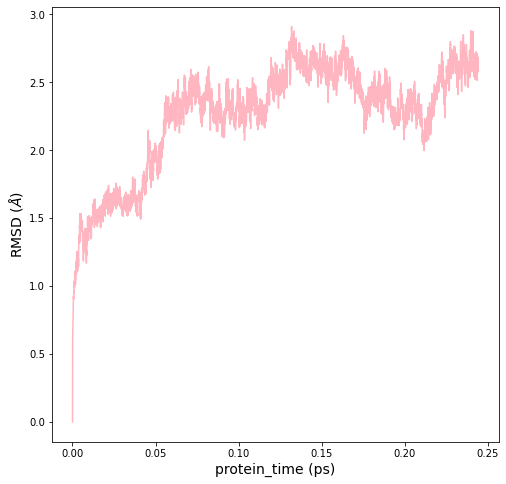

In [729]:
fig = plt.figure(figsize=(8, 8))
plt.plot(protein_time, protein_rmsd_values, "-", color='lightpink')
plt.xlabel("protein_time (ps)", fontsize = 14)
plt.ylabel(r"RMSD ($\AA$)", fontsize = 14)


In [730]:
ligand_frames = []
with mda.lib.formats.libdcd.DCDFile(data_path+"2ZFF__1__P_Dynamics_2.dcd") as trajectory_file:
    for frame in trajectory_file:
        ligand_frames.append(frame)

In [731]:
ligand_first_frame = ligand_frames[0].xyz
universe = mda.Universe(data_path+"2ZFF__1__P_Dynamics_2.prmtop", data_path+"2ZFF__1__P_Dynamics_2.dcd")
reference_universe = mda.Universe(data_path+"2ZFF__1__P_Dynamics_2.prmtop", ligand_first_frame)

In [732]:
ligand_structure = universe.select_atoms("resname MOL")
reference_ligand_structure = reference_universe.select_atoms("resname MOL")

In [733]:
ligand_structure

<AtomGroup with 58 atoms>

In [734]:
reference_ligand_structure

<AtomGroup with 58 atoms>

In [735]:
rmsd_ligand = mda.analysis.rms.RMSD(ligand_structure, reference_ligand_structure)
rmsd_ligand.run()

In [736]:
ligand_rmsd_result = rmsd_ligand.results.rmsd.T
print(ligand_rmsd_result)

[[0.00000000e+00 1.00000000e+00 2.00000000e+00 ... 4.99700000e+03
  4.99800000e+03 4.99900000e+03]
 [0.00000000e+00 4.88882123e-05 9.77764246e-05 ... 2.44294397e-01
  2.44343285e-01 2.44392173e-01]
 [0.00000000e+00 7.23503949e-01 6.29332898e-01 ... 2.35109899e+00
  2.34988402e+00 2.44551526e+00]]


In [737]:
ligand_time = ligand_rmsd_result[1]
ligand_rmsd_values = ligand_rmsd_result[2]

Text(0, 0.5, 'RMSD ($\\AA$)')

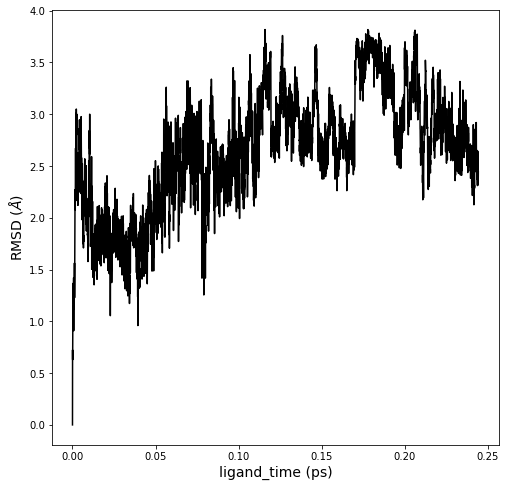

In [738]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.plot(ligand_time, ligand_rmsd_values, "k-")
ax.set_xlabel("ligand_time (ps)", fontsize = 14)
ax.set_ylabel(r"RMSD ($\AA$)", fontsize = 14)


In [739]:
mean_rmsd_ligand = np.mean(ligand_rmsd_values)
standard_deviation_rmsd_ligand = np.std(ligand_rmsd_values)

In [740]:
print(f"Average RMSD of ligand: ({mean_rmsd_ligand:.3f} \u00B1 {standard_deviation_rmsd_ligand:.3f}) \u212B")

Average RMSD of ligand: (2.652 ± 0.566) Å


Distance between protein centre of mass and ligand centre of mass

In [741]:
protein_centre_of_mass = protein_structure.center_of_mass()
ligand_centre_of_mass = ligand_structure.center_of_mass()

In [742]:
protein_centre_of_mass

array([35.88739916, 50.76198644, 29.55668796])

In [743]:
x_1 = protein_centre_of_mass[0]
y_1 = protein_centre_of_mass[1]
z_1 = protein_centre_of_mass[2]

In [744]:
x_2 = ligand_centre_of_mass[0]
y_2 = ligand_centre_of_mass[1]
z_2 = ligand_centre_of_mass[2]

In [745]:
print(f"Protein CoM: x: {x_1:.2f}, y: {y_1:.2f}, z: {z_1:.2f}")
print(f"Ligand CoM: x: {x_2:.2f}, y: {y_2:.2f}, z: {z_2:.2f}")

Protein CoM: x: 35.89, y: 50.76, z: 29.56
Ligand CoM: x: 41.11, y: 35.67, z: 30.12


In [746]:
distance_array = mda.analysis.distances.distance_array(ligand_centre_of_mass, protein_centre_of_mass)
distance = distance_array[0][0]
distance

15.976656847777011

In [747]:
print(f"Distance between protein CoM and ligand CoM: {distance:.3f} \u212B")

Distance between protein CoM and ligand CoM: 15.977 Å
